In [12]:
import pandas as pd
conso_men = pd.read_csv("/Users/coulibalykani/Desktop/Projet 3/projet3/Dataframe/previsions_conso_ML_Lasso.csv")
# Renommer la catégorie
conso_men['Famille de produits'] = conso_men['Famille de produits'].replace(
    'Céréales et produits à base de céréales', 
    'Riz, pâtes et céréales'
)
#conso_men['Famille de produits'].unique()
conso_men


,Famille de produits,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
0,"Céréales et produits à base de céréales (riz, ...",14 370,14 978,15 509,15 838,16 296,16 485,16 806,17 210,18 478,...,23891.0,24870.0,25314.0,27203.0,29622.0,33310.0,34476.096808,36528.824930,37764.758205,39879.223753
1,Viandes,22 455,23 868,24 597,25 185,25 508,26 056,26 551,27 155,27 834,...,30389.0,30259.0,32812.0,31621.0,31628.0,33716.0,33502.926228,34933.719980,35838.645807,37402.804561
2,Poissons et autres fruits de mer,5 742,6 009,6 216,6 488,6 472,6 459,6 713,6 863,6 944,...,7271.0,7309.0,7783.0,7837.0,7513.0,7502.0,7374.998671,7451.641163,7570.982104,7687.582655
3,"Lait, produits laitiers divers et œufs",12 646,13 417,13 934,14 394,14 629,14 751,14 992,15 491,17 075,...,19014.0,19444.0,20621.0,20120.0,21389.0,24539.0,24989.056275,26776.951804,27382.707568,28892.176486
4,Huiles et graisses,2 575,2 620,2 641,2 660,2 673,2 680,2 786,2 751,2 980,...,3307.0,3425.0,3755.0,3538.0,3900.0,4211.0,4354.356942,4507.940785,4627.116221,4738.252639
5,Fruits et fruits à coque,5 395,6 026,6 478,6 708,6 917,6 994,7 196,7 335,7 524,...,10252.0,10371.0,11492.0,11197.0,11799.0,12038.0,12148.420002,12514.083571,12873.633508,13037.929955
6,"Légumes, tubercules, bananes plantains, banane...",9 613,10 141,10 595,10 940,10 712,11 040,11 533,11 987,12 168,...,15825.0,16843.0,18124.0,17704.0,18444.0,20004.0,20149.887303,21412.914408,22151.346078,22830.180915
7,"Sucre, confiserie et desserts",7 049,7 411,7 704,8 280,8 501,8 587,8 642,8 743,9 368,...,11375.0,11382.0,11911.0,11930.0,12402.0,13782.0,13890.211381,14602.653516,14745.835116,15308.335948
8,Plats préparés et autres produits alimentaires,7 891,8 307,8 721,9 268,9 893,10 265,10 653,11 215,12 040,...,15279.0,15670.0,16627.0,17410.0,18550.0,20066.0,20625.198546,21676.390078,22314.556287,23358.293931
9,Jus de fruits et de légumes,1 451,1 528,1 587,1 763,1 804,1 946,2 012,2 162,2 356,...,2811.0,2777.0,2758.0,2681.0,2795.0,2899.0,2888.169077,2895.294126,2813.842977,2734.239389


In [13]:
# 1. Préparation des données
# Fonction pour nettoyer les nombres
def clean_number(x):
    if isinstance(x, str):
        # Remplacer les espaces insécables et les espaces normaux, puis la virgule par un point
        return float(x.replace('\u202f', '').replace(' ', '').replace(',', '.'))
    return float(x)

# Nettoyage des colonnes numériques
for col in conso_men.columns[1:]:  # Toutes les colonnes sauf la première
    conso_men[col] = conso_men[col].apply(clean_number)

# 2. Création d'un graphique à barres empilées
import plotly.express as px

# Transformer les données pour le format long
df_melted = conso_men.melt(
    id_vars=['Famille de produits'], 
    var_name='Année', 
    value_name='Dépenses'
)

# Création du graphique à barres empilées
fig = px.bar(
    df_melted, 
    x='Année', 
    y='Dépenses', 
    color='Famille de produits',
    title='<b>Répartition des dépenses par famille de produits (2000-2024)</b>',
    labels={'Dépenses': 'Dépenses (en millions d\'euros)'},
    height=800,  # Hauteur augmentée pour accommoder la légende en bas
    width=900   # Largeur augmentée
)

# Améliorer la lisibilité
fig.update_layout(
    xaxis_tickangle=-45,
    legend_title_text='<b>Famille de produits</b>',
    legend=dict(
        orientation="v",  # Légende verticale
        yanchor="top",    # Ancrage en haut
        y=-0.15,          # Position sous le graphique (valeur négative pour descendre)
        xanchor="center", # Centrage horizontal
        x=0.5,            # Position horizontale centrée
        font=dict(size=10),  # Taille de police de la légende
        itemsizing='constant',  # Taille constante des symboles
        itemwidth=30,      # Largeur des items de légende
        traceorder='normal'  # Ordre normal des éléments
    ),
    title=dict(
        y=0.95,          # Position verticale du titre (0-1)
        x=0.5,           # Position horizontale centrée
        xanchor='center', # Ancrage du titre
        yanchor='top'    # Ancrage en haut
    ),
    title_font_size=24,  # Taille du titre augmentée
    font=dict(size=11),  # Taille de police générale
    margin=dict(l=50, r=50, t=150, b=250),  # Marge inférieure augmentée pour la légende
    xaxis=dict(
        title_font=dict(size=14),  # Taille du titre de l'axe X
        tickfont=dict(size=12)     # Taille des étiquettes de l'axe X
    ),
    yaxis=dict(
        title_font=dict(size=14),  # Taille du titre de l'axe Y
        tickfont=dict(size=12)     # Taille des étiquettes de l'axe Y
    )
)

# Désactiver l'affichage des valeurs sur les barres
fig.update_traces(
    texttemplate='',  # Pas de texte sur les barres
    textposition='none'
)

# Ajuster l'espacement entre les barres
fig.update_layout(bargap=0.2)

# Afficher la grille pour une meilleure lisibilité
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

fig.show()

In [14]:
# 1. Préparation des données (si ce n'est pas déjà fait)
def clean_number(x):
    if isinstance(x, str):
        return float(x.replace('\u202f', '').replace(' ', '').replace(',', '.'))
    return float(x)

for col in conso_men.columns[1:]:
    conso_men[col] = conso_men[col].apply(clean_number)

# 2. Création du graphique avec sélecteur d'année
import plotly.express as px
import pandas as pd
from ipywidgets import interact, widgets

# Création d'une liste d'années disponibles
annees = sorted(conso_men.columns[1:])  # Toutes les colonnes sauf 'Famille de produits'

# Fonction pour mettre à jour le graphique
def update_dashboard(annee):
    # Préparation des données pour l'année sélectionnée
    df_annee = conso_men[['Famille de produits', annee]].copy()
    df_annee = df_annee.rename(columns={annee: 'Dépenses'})
    
    # Préparation du top 5
    top5 = df_annee.nlargest(5, 'Dépenses').copy()
    top5['Part (%)'] = (top5['Dépenses'] / top5['Dépenses'].sum() * 100).round(1)
    
    # Création du diagramme circulaire
    fig = px.pie(
        df_annee,
        values='Dépenses',
        names='Famille de produits',
        height=800,
        width=1000,
        hole=0.3
    )
    
    # Personnalisation du graphique
    fig.update_traces(
        textposition='inside',
        textinfo='percent+label',
        textfont_size=12,
        marker=dict(line=dict(color='#FFFFFF', width=1))
    )
    
    # Création du texte pour le top 5
    top5_text = "<b>🏆 TOP 5 des dépenses :</b><br>"
    for i, (_, row) in enumerate(top5.iterrows(), 1):
        top5_text += f"{i}. {row['Famille de produits']} : {row['Dépenses']:,.0f}€ ({row['Part (%)']}%)<br>"
    
    # Ajout du top 5 comme annotation sous le titre
    fig.add_annotation(
        x=0.5,  # Centré
        y=0.95,  # Position Y augmentée pour remonter
        xref="paper",
        yref="paper",
        text=top5_text,
        showarrow=False,
        align="center",
        font=dict(size=11),
        bordercolor="#d3d3d3",
        borderwidth=1,
        borderpad=10,
        bgcolor="white",
        opacity=0.9
    )
    
    # Ajustement de la marge supérieure pour faire de la place au top 5
    fig.update_layout(
        margin=dict(l=50, r=50, t=5, b=50),  # Augmentation de la marge supérieure
        legend=dict(
            orientation="v",
            yanchor="middle",
            y=0.5,
            xanchor="left",
            x=1.05,
            font=dict(size=10)
        ),
        title=dict(
            text=f'Répartition des dépenses par famille de produits en {annee} pour les ménages français',
            y=0.98,  # Ajustement de la position du titre
            yanchor='top'
        ),
        title_font_size=18,
        showlegend=True
    )
    
    fig.show()

# Création et affichage du sélecteur d'année avec interact
interact(
    update_dashboard, 
    annee=widgets.Dropdown(
        options=annees,
        value=annees[-1],  # Dernière année par défaut
        description='Année:',
        style={'description_width': 'initial'}
    )
)

interactive(children=(Dropdown(description='Année:', index=27, options=('2000', '2001', '2002', '2003', '2004'…

<function __main__.update_dashboard(annee)>


📈 Prédictions pour 'Viandes':
  2028 : 36013.93 millions d'euros
  2029 : 36448.72 millions d'euros
  2030 : 36883.50 millions d'euros


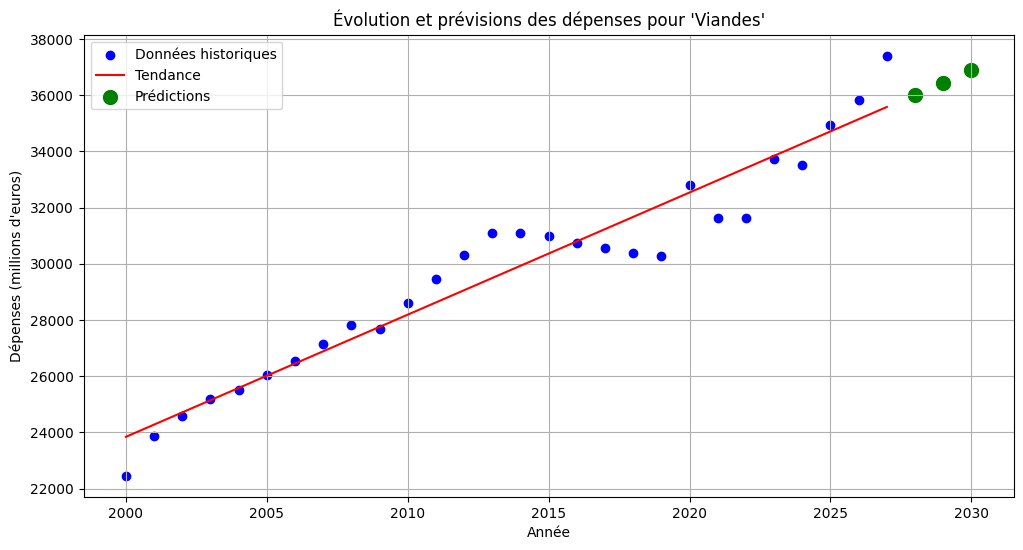

LinearRegression()

In [15]:
# 1. Préparation des données (format long)
df_melted = conso_men.melt(
    id_vars=['Famille de produits'], 
    var_name='Année', 
    value_name='Dépenses'
)

# Conversion de l'année en entier
df_melted['Année'] = df_melted['Année'].astype(int)

# 2. Fonction de régression et prédiction
def predict_consumption(product_name, years_ahead=3):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression

    # Filtrer les données pour la famille de produits choisie
    product_data = df_melted[df_melted['Famille de produits'] == product_name]
    
    if product_data.empty:
        print(f"Aucune donnée trouvée pour '{product_name}'.")
        return None

    # Préparer les données d'entrée X (année) et de sortie y (dépenses)
    X = product_data[['Année']].values  # shape (n, 1)
    y = product_data['Dépenses'].values.reshape(-1, 1)  # shape (n, 1)

    # Entraîner un modèle de régression linéaire
    model = LinearRegression()
    model.fit(X, y)

    # Générer les années futures à prédire
    max_year = int(X.max())
    future_years = [[max_year + i] for i in range(1, years_ahead + 1)]
    predictions = model.predict(future_years)

    # Afficher les prédictions dans le terminal
    print(f"\n📈 Prédictions pour '{product_name}':")
    for year, pred in zip(range(max_year + 1, max_year + years_ahead + 1), predictions):
        print(f"  {year} : {pred[0]:.2f} millions d'euros")

    # Tracer le graphique
    plt.figure(figsize=(12, 6))
    plt.scatter(X, y, color='blue', label='Données historiques')

    # Tracer la droite de régression
    x_line = np.array([[X.min()], [X.max()]])
    y_line = model.predict(x_line)
    plt.plot(x_line, y_line, color='red', label='Tendance')

    # Ajouter les prédictions au graphique
    future_x = np.array(future_years).flatten()
    plt.scatter(future_x, predictions.flatten(), color='green', s=100, label='Prédictions')

    # Mise en forme du graphique
    plt.title(f"Évolution et prévisions des dépenses pour '{product_name}'")
    plt.xlabel("Année")
    plt.ylabel("Dépenses (millions d'euros)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return model

# 3. Exemple d'utilisation
predict_consumption("Viandes")


Catégories disponibles :
- Autres boissons alcoolisées 
- Autres boissons non alcoolisées 
- Bière 
- Café et succédanés de café 
- Céréales et produits à base de céréales (riz, pâtes, etc)
- Eau 
- Fruits et fruits à coque 
- Huiles et graisses 
- Jus de fruits et de légumes 
- Lait, produits laitiers divers et œufs 
- Légumes, tubercules, bananes plantains, bananes de cuisine et légumes secs 
- Plats préparés et autres produits alimentaires 
- Poissons et autres fruits de mer 
- Sodas
- Spiritueux et liqueurs 
- Sucre, confiserie et desserts 
- Thé, maté et autres produits d’origine végétale pour tisanes 
- Viandes
- Vin
Prédictions pour Viandes:
  2025: 34709.56 millions d'euros
  2026: 35144.35 millions d'euros
  2027: 35579.14 millions d'euros


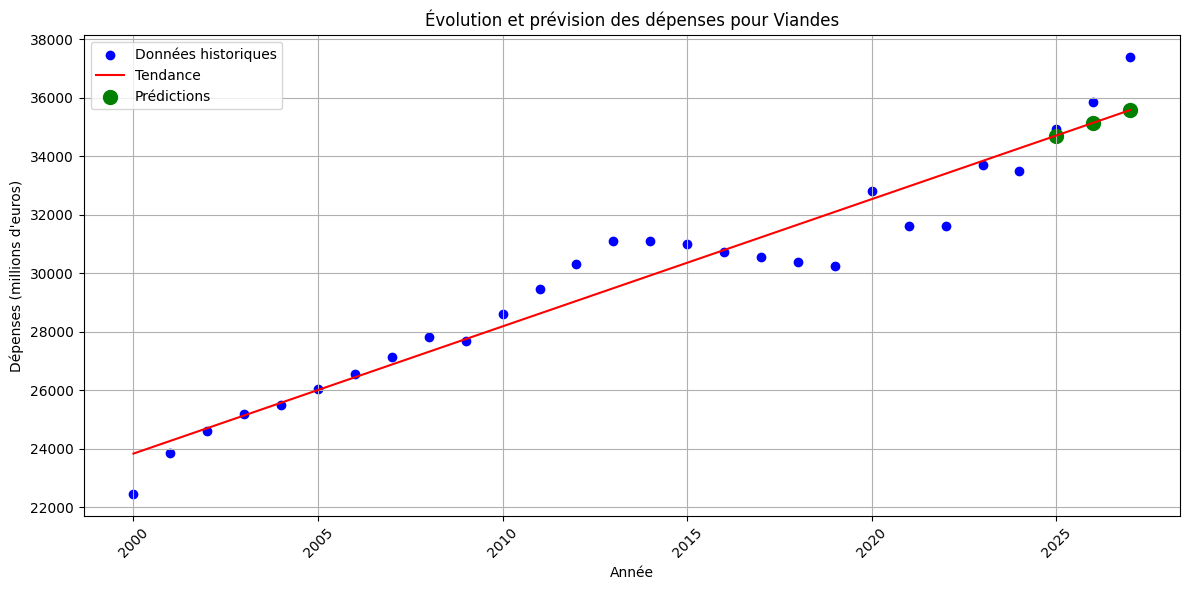

LinearRegression()

In [16]:
# 1. Fonction pour nettoyer les valeurs numériques
def clean_value(x):
    if isinstance(x, str):
        return float(x.replace(' ', '').replace(' ', '').replace(',', '.'))
    return float(x)

# 2. Préparation des données pour la régression
# Transformer les données en format long
df_melted = conso_men.melt(id_vars=['Famille de produits'], 
                          var_name='Année', 
                          value_name='Dépenses')

# Nettoyer les valeurs numériques
df_melted['Dépenses'] = df_melted['Dépenses'].apply(clean_value)
df_melted['Année'] = df_melted['Année'].astype(int)

# 3. Fonction pour effectuer la régression et faire des prédictions
def predict_consumption(product_name, years_ahead=3):
    try:
        # Filtrer les données pour le produit spécifié
        product_data = df_melted[df_melted['Famille de produits'] == product_name]
        
        if len(product_data) == 0:
            print(f"Aucune donnée trouvée pour {product_name}")
            available_products = df_melted['Famille de produits'].unique()
            print("\nCatégories disponibles :")
            for p in sorted(available_products):
                print(f"- {p}")
            return None
            
        # Séparer les caractéristiques (X) et la cible (y)
        X = product_data[['Année']].values
        y = product_data['Dépenses'].values.reshape(-1, 1)
        
        # Créer et entraîner le modèle de régression linéaire
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
        model.fit(X, y)
        
        # Faire des prédictions pour les années futures
        future_years = [[2024 + i] for i in range(1, years_ahead + 1)]
        predictions = model.predict(future_years)
        
        # Afficher les résultats
        print(f"Prédictions pour {product_name}:")
        for year, pred in zip(range(2025, 2025 + years_ahead), predictions):
            print(f"  {year}: {pred[0]:.2f} millions d'euros")
        
        # Afficher le graphique
        import matplotlib.pyplot as plt
        import numpy as np
        
        plt.figure(figsize=(12, 6))
        plt.scatter(X, y, color='blue', label='Données historiques')
        
        # Tracer la droite de régression
        x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_range = model.predict(x_range)
        plt.plot(x_range, y_range, color='red', label='Tendance')
        
        # Ajouter les prédictions
        future_x = np.array(future_years).reshape(-1)
        plt.scatter(future_x, predictions, color='green', label='Prédictions', s=100)
        
        plt.title(f"Évolution et prévision des dépenses pour {product_name}")
        plt.xlabel('Année')
        plt.ylabel('Dépenses (millions d\'euros)')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        return model
        
    except Exception as e:
        print(f"Une erreur s'est produite : {str(e)}")
        return None

# 4. Exemple d'utilisation
# Vérifier les catégories disponibles
print("Catégories disponibles :")
for category in sorted(df_melted['Famille de produits'].unique()):
    print(f"- {category}")

# Faire une prédiction pour une catégorie
predict_consumption("Viandes")